# **Análisis exploratorio y estadística**
# AE13 - Introducción a las técnicas de EDA - Analizando Car Features


## <font color='blue'>**Introducción**</font>

**¿Qué es el análisis exploratorio de datos?**
El análisis exploratorio de datos (EDA por sus siglas en inglés) implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender, no confirmar hipótesis estadísticas. Con el EDA, se pueden hallar anomalías en los datos, como valores atípicos u observaciones inusuales, revelar patrones, comprender posibles relaciones entre variables y generar preguntas o hipótesis interesantes que se pueden comprobar más adelante mediante métodos estadísticos más formales.

Como el EDA implica explorar, es un proceso iterativo. Lo más probable es que se averigüen diferentes aspectos sobre los datos a partir de diferentes gráficos. Los objetivos típicos son comprender:

* La distribución de variables en su conjunto de datos. Esto es, ¿cuál es la
forma de sus datos? ¿Está sesgada la distribución? ¿Tiene forma de montículo? ¿Es bimodal?
* Las relaciones entre variables. Si sus datos tienen o no valores atípicos o puntos inusuales puede indicar problemas de calidad de los datos o conducir a descubrimientos interesantes.
* Si sus datos tienen o no patrones temporales.


**¿Cuándo debo utilizarlo?**
El análisis exploratorio de datos es una potente herramienta para explorar un conjunto de datos. Incluso cuando su objetivo es efectuar análisis planificados, el EDA puede utilizarse para limpiar datos, para análisis de subgrupos o simplemente para comprender mejor los datos. Un paso inicial importante en cualquier análisis de datos es representar los datos gráficamente.

**¿Cómo realizar análisis de datos exploratorios?**

Esta es una de esas preguntas que todos están interesados en conocer la respuesta. Bueno, la respuesta asi como en cualquier proyecto de ciencia de datos,  es que depende del conjunto de datos en el que esté trabajando. No existe un método o métodos comunes para realizar EDA, sin embargo en este notebook veremos algunos métodos y técnicas de uso frecuente en el proceso de EDA.

**¿Qué datos estamos explorando hoy?**

El primer conjunto de datos que exploraremos es sobre autos. El conjunto de datos se puede descargar desde [Car Features and MSRP](https://www.kaggle.com/CooperUnion/cardataset). El conjunto de datos, tiene aproximadamente 12.000 filas y 16 columnas, las cuales contienen características automóviles tales como: marca, modelo, tipo de combustible, potencia del motor, tipo de transmisión, rendimiento de combustible en carretera y ciudad (en millas por galón, MPG), entre otras.

En este tutorial, exploraremos los datos y los prepararemos para el modelado.

## <font color='blue'>**Importando las librerias necesarias**</font>

Usualmente para realizar EDA, necesitaremos 4 librerías. La librería `NumPy` para todo lo que necesitemos realizar con matrices y álgebra lineal. `Pandas` para realizar el procesamniento del dataset, ordenarlo, agruparlo, integrarlo con otro dataset o filtrarlo. Finalmente, todo el proceso de visualización, utilizaremos principalemnte dos librerías `Seaborn` y `matplotlib`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                       #Visualizacion
import matplotlib.pyplot as plt             #visualization
%matplotlib inline

## <font color='blue'>**Vamos a cargar los datos**</font>


Utilizaremos `Pandas` para cargar los datos en un DataFrame para su procesamiento. Por la extensión del archivo, podemos ver que los mismos vienen en formato `.csv` (separados por comas).

In [2]:
# Con esto debe dar permiso a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Aqui debe cargar su ruta
path = '/content/drive/MyDrive/3.Analisis exploratorio y Estadistica/NT_Originales/'
df = pd.read_csv(path + "data.csv")
# despleguemos las primeras 10 columnas, transpuestas
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0,230.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury,"Luxury,Performance","Luxury,Performance","Luxury,High-Performance",Luxury,Luxury


Es una buena práctica mirar la cola del archivo y ver que en ella se mantiene la estructura de los datos.

In [ ]:
df.tail(5)

## <font color='blue'>**Verificando el tipo de dato**</font>


Aquí verificamos los tipos de datos, porque a veces algunos atributos no se almacenan con el tipo de dato correcto. Esto es importante al momento de realizar las visualizaciones. Al realizar la comparacion con los datos vemos que se han cargado de forma correcta.

__Nota:__ cada vez que `Pandas` no es capaz de interpretar adecuadamente una columna o, incluso un único dato dentro de una columna, le asignará el tipo `object` a toda la columna.


In [ ]:
df.dtypes

## <font color='blue'>**Renombrando columnas**</font>

Vemos varios  nombres de las columnas son confusos de leer, así que es mejor modificar los nombres de las columnas.

In [ ]:
df = df.rename(columns={"Engine HP": "HP",
                        "Engine Cylinders": "Cylinders",
                        "Transmission Type": "Transmission",
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H",
                        "city mpg": "MPG-C",
                        "MSRP": "Price" }) # Manufacturer's Suggested Retail Price
df.head(5)

## <font color='blue'>**Eliminando filas duplicadas**</font>

Verifiquemos y eliminamos filas duplicadas.

In [ ]:
df.shape

In [ ]:
df.duplicated()

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Numero de filas duplicadas: ", duplicate_rows_df.shape[0])

In [ ]:
# Contamos las filas que hay en cada columna
df.count()

In [ ]:
# Eliminamos las filas duplicadas
df = df.drop_duplicates()

In [ ]:
# Y volvemos a contar
df.count()

## <font color='blue'>**Valores nulos**</font>

Este es un paso importante también y existen distintos métodos de completar los datos faltantes. Cuando el porcentaje de datos nulos es bajo, uno puede probar eliminando los registros y evaluar si es que algunos de los eliminados son relevantes. En caso de no eliminar los registros las formas más frecuentes de agregar un valor es incoprporar la media, mediana, sobre el total de la problación o respecto de un número de vecinos cercanos.  En este caso, veremos una columna con una cantidad significativa de datos faltantes (Market Category), la cual, en esta oportunidad decidiremos eliminar. Para el resto de  columnas con valores nulos, realizaremos una imputación.

**Nota**: Utilizaremos la librería ***Missingno***, la cual es una excelente biblioteca de Python, fácil de usar, y que proporciona una serie de visualizaciones para comprender la presencia y distribución de los datos faltantes dentro de un marco de datos de pandas. Esto puede ser en forma de gráfico de barras, gráfico de matriz, mapa de calor o dendrograma.

El método `info()` nos entrega una excelente visión de los `non-null`.

In [ ]:
df.info()

Vemos que la columna `Market Category` tiene una cantidad significativa de nulos. Veamos esto con la librería __Missingno__.

In [ ]:
import missingno as msno
%matplotlib inline

# Primero la función matrix
msno.matrix(df, figsize=(15, 10), color=(0.8,0.2,0.2), fontsize=12)
plt.show()

El __gráfico de matriz__ es una gran herramienta si está trabajando con datos muy relacionados entre sí o con series de tiempo. Proporciona un relleno de color para cada columna. Cuando hay datos presentes, el gráfico se sombrea en gris (o el color de su elección), y cuando está ausente, el gráfico se muestra en blanco.

En el lado derecho de la gráfica hay un minigráfico que va desde 0 a la izquierda hasta el número total de columnas en el marco de datos a la derecha. Cuando una fila tiene un valor en cada columna, la línea estará en la posición máxima derecha. A medida que los valores faltantes comienzan a aumentar dentro de esa fila, la línea se moverá hacia la izquierda.

In [ ]:
# Segundo la función bar
msno.bar(df, figsize=(12, 6), fontsize=12)
plt.show()

El __gráfico de barras__ proporciona un gráfico simple donde cada barra representa una columna dentro del marco de datos. La altura de la barra indica qué tan completa está esa columna, es decir, cuántos valores no nulos están presentes.

En el lado izquierdo de la gráfica, la escala del eje Y varía de 0,0 a 1,0, donde 1,0 representa el 100 % de la integridad de los datos. Si la barra es menor que esto, indica que nos faltan valores dentro de esa columna.

En el lado derecho de la gráfica, la escala se mide en valores de índice. Con la esquina superior derecha representando el número máximo de filas dentro del set de datos.

A lo largo de la parte superior de la gráfica, hay una serie de números que representan el recuento total de los valores no nulos dentro de esa columna.

In [ ]:
# Tercero la función heatmap
msno.heatmap(df, figsize=(10,10), fontsize=12)
plt.show()

El __mapa de calor__ se utiliza para identificar correlaciones de nulidad entre cada una de las diferentes columnas. En otras palabras, se puede utilizar para identificar si existe una relación en presencia de valores nulos entre cada una de las columnas.

Los valores cercanos a 1 positivo indican que la presencia de valores nulos en una columna está correlacionada con la presencia de valores nulos en otra columna.

Los valores cercanos a 1 negativo indican que la presencia de valores nulos en una columna no está correlacionada con la presencia de valores nulos en otra columna. En otras palabras, cuando hay valores nulos en una columna, hay valores de datos en la otra columna y viceversa.

Los valores cercanos a 0 indican que hay poca o ninguna relación entre la presencia de valores nulos en una columna en comparación con otra.

In [ ]:
# Y por último la dunción dendrogram
msno.dendrogram(df, figsize=(15,10), fontsize=12)
plt.show()

El __gráfico de dendrograma__ proporciona un gráfico similar a un árbol generado a través de la agrupación jerárquica y agrupa columnas que tienen fuertes correlaciones en la nulidad.

Si varias columnas se agrupan en el nivel cero, la presencia de valores nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de valores nulos en las otras columnas.

Cuanto más separadas estén las columnas en el árbol, menos probable es que los valores nulos puedan correlacionarse entre las columnas.

Tal como dijimos, eliminaremos la columna `Market Category`. Atención que hay que ser muy cuidadosos con la decisión de eliminar columnas.

In [ ]:
df = df.drop(['Market Category'], axis=1)

In [ ]:
# Verificamos nuevamente los nulos
print(df.isnull().sum())

### <font color='green'>**Actividad 1**</font>

1. Realice una imputación de datos utilizando la media para las variables `HP` y `Cylinders`.
2. Elimine las filas restantes que tengan valores nulos.


In [ ]:
# Imaginen que queremos imputar los datos de los cilindros faltantes
# utilizando la moda
df.Cylinders.mode()

In [ ]:
# Un error frecuente es intentar realizar una asignación encadenada
# la cual genera vista de nuestro dataframe
# esta operación genera un Warning: SettingWithCopyWarning
df.Cylinders[df.Cylinders.isnull()] = df.Cylinders.mode()

In [ ]:
# lo peor de todo es que la operción que intentamos no se realizaó
# independientemente que solo fuera un Warning
df.Cylinders[df.Cylinders.isnull()]

In [ ]:
# la solución es combinar las operaciones utilizando "loc" de forma tal que pandas
# se asegure que se está trabajando sobre el dataframe original y no en una vista de él.

# deconstrucción
# creamos un filtro de nulos (True o False) en la columna 'HP'
df.loc[:,'HP'].isnull()

In [ ]:
# deconstrucción
# aplicamos el filtro anterior en la columna (esta es la operación encadenada)
df.loc[df.loc[:,'HP'].isnull(),'HP']

In [ ]:
# Tu códugo aquí ...


<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Detectando outliers**</font>

Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. A menudo, es una buena idea detectar y eliminar los valores atípicos.  Cuando se quieren analizar comportamientos frecuentes y obtener información de éstos, es una buena idea eliminar los puntos atípicos. En este caso utilizaremo el rango intercuartílico para realizar la detección y eliminación de valores atípicos. No es la única forma, pero se utiliza fecuentemente. Una técnica multidimensional para eliminar puntos atípicos es [db-scan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  

Cuando realizamos un análisis univariado, frecuentemente, los valores atípicos se pueden ver con visualizaciones usando un `box plo`t. A continuación, se muestra el box plot de `MSRP` (`Precio`), cilindros, caballos de fuerza y tamaño del motor.

Puede probar otros también.

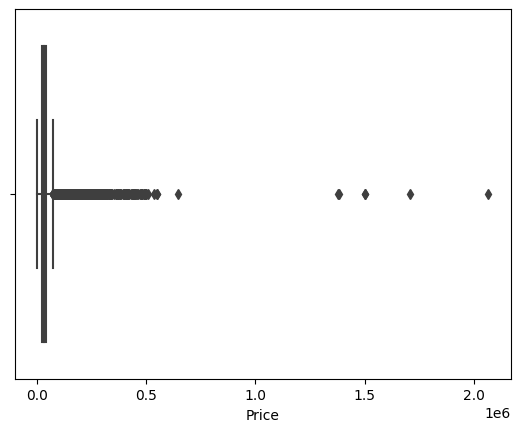

In [ ]:
sns.boxplot(x=df['Price']);

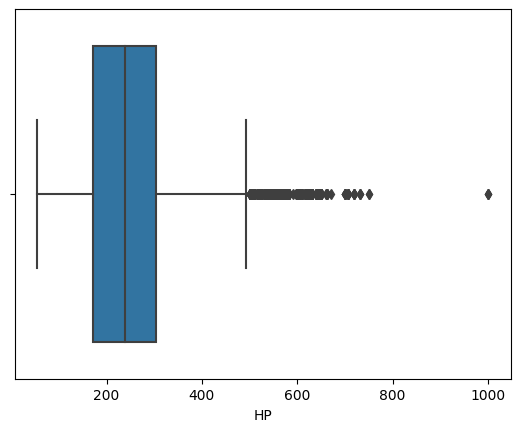

In [ ]:
sns.boxplot(x=df['HP']);

In [ ]:
sns.boxplot(x=df['Cylinders']);

In [ ]:
Q1 = df.quantile(0.25)  # Q1, Q3 y IQR son Series
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
values = zip(Q1.index, Q1, Q3, IQR)
print(f'{"Atributo":20}{"Q1":>10}{"Q3":>10}{"IQR":>10}')
print('-'*50)
for i in values:
    print(f'{i[0]:20}{i[1]:10.1f}{i[2]:10.1f}{i[3]:10.1f}')

### <font color='green'>**Actividad 2 (Guiada en sala principal)**</font>
### Eliminando outliers

Elimine los puntos atípicos y desarrolle las mismas visualizaciones anteriores. Compárelas.

In [ ]:
# Tu código aquí ...
# Calcule el límite inferior
out_inf = Q1 - 1.5 * IQR
out_inf

In [ ]:
# Calcule el límite superior
out_sup = Q3 + 1.5 * IQR
out_sup

In [ ]:
type(out_inf)

In [ ]:
# Debemos alinear las columnas del DataFrame con el índice de la Serie
a1, a2 = df.align(out_inf, axis=1, copy=False)

In [ ]:
# Verificamos que las columnas de 'a1' son las mismas que el indice de 'a2'
a1.columns == a2.index

In [ ]:
# Nuestro df es ahora 'a1' lo alineamos con out_sup
a1, a3 = a1.align(out_sup, axis=1, copy=False)

In [ ]:
# Todo alineado
print(a1.columns == a2.index)
print(a2.index == a3.index)

In [ ]:
# Generamos un nuevo DataFrame (df2) sin los outliers
df2 = df[~((a1 < a2) | (a1 > a3)).any(axis=1)]

In [ ]:
# Comprobamos con Year
# En el df original (con outliers debiera darnos una valor menor al
# límite inferior (out_inf.Year)
df.Year.min()

In [ ]:
# En df2 no debiera ocurrir eso ..
df2.Year.min()

In [ ]:
# Se deberían haber eliminado ... registros
df[df.Year < out_inf.Year]['Year'].count()

In [ ]:
# Registros eliminados
df2.count() - df.count()

In [ ]:
# Veamos los registros por atributo
df3 = df[~((a1 < a2) | (a1 > a3))] #.any(axis=1)]
df3.count() - df.count()

In [ ]:
# Visualiza los outliers de HP en el Dataframe original
sns.boxplot(x=df2['HP'], color='r')
plt.show()

In [ ]:
# Y en el DataFrame sin outliers
sns.boxplot(x=df2['Cylinders'], color='r')
plt.show()

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='blue'>**Deconstrucción (OPCIONAL)**</font>

##<font color='red'>Explicando los __aling__ de la Actividad 2</font>

In [ ]:
dfA = pd.DataFrame([[10,20,30,40], [60,70,80,90], [600,700,800,900]],
                   columns=['A', 'B', 'C', 'D'],
                   index=[2,3,4])

dfB = pd.DataFrame([[1,2,3,4], [6,7,8,9]],
                   columns=['B', 'D', 'E', 'A'],
                   index=[1,2])

DataFrame.align no combina dos DataFrames, sino que los alínea para que ambos tengan la misma configuración de fila y/o columna.

In [ ]:
print(dfA)

     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900


In [ ]:
print(dfB)

   B  D  E  A
1  1  2  3  4
2  6  7  8  9


Alineémoslos usando columnas (`axis=1`)

In [ ]:
al_1, al_2 = dfA.align(dfB, join='outer', axis=1)
print(al_1)
print()
print(al_2)

     A    B    C    D   E
2   10   20   30   40 NaN
3   60   70   80   90 NaN
4  600  700  800  900 NaN

   A  B   C  D  E
1  4  1 NaN  2  3
2  9  6 NaN  7  8


* Las columnas de `dfB` se reordenaron.
* Ambos DataFrames tienen las mismas columnas ahora.
* Ningún valor fue alterado.
* Las etiquetas de las filas no se alteraron ya que utilizamos un `align` por columnas (`axis=1`)
* Las columnas faltantes en un Dataframe respecto del otro se incluyen y se completan con `NaN`.

Podemos alinear ambas, columnas y filas:

In [ ]:
al_1, al_2 = dfA.align(dfB, join='outer', axis=None)
print(al_1)
print()
print(al_2)

       A      B      C      D   E
1    NaN    NaN    NaN    NaN NaN
2   10.0   20.0   30.0   40.0 NaN
3   60.0   70.0   80.0   90.0 NaN
4  600.0  700.0  800.0  900.0 NaN

     A    B   C    D    E
1  4.0  1.0 NaN  2.0  3.0
2  9.0  6.0 NaN  7.0  8.0
3  NaN  NaN NaN  NaN  NaN
4  NaN  NaN NaN  NaN  NaN


Y podemos hacer otras operaciones, como por ejemplo, `join=inner`

In [ ]:
al_1, al_2 = dfA.align(dfB, join='inner', axis=1)
print(al_1)
print()
print(al_2)

     A    B    D
2   10   20   40
3   60   70   90
4  600  700  900

   A  B  D
1  4  1  2
2  9  6  7


Lo concreto es que ahora, en nuestro ejercicio, podemos hacer operaciones entre Dataframes ya que tienen la misma estructura.

In [ ]:
al_1, al_2 = dfA.align(dfB, join='outer', axis=1)
print(al_1)
print()
print(al_2)

al_1 - al_2

     A    B    C    D   E
2   10   20   30   40 NaN
3   60   70   80   90 NaN
4  600  700  800  900 NaN

   A  B   C  D  E
1  4  1 NaN  2  3
2  9  6 NaN  7  8


,A,B,C,D,E
1,NaN,NaN,NaN,NaN,NaN
2,1.0,14.0,NaN,33.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


Veamos lo que hicimos en el ejercicio al alinear un DataFrame con una Serie. Creamos una Serie `sC`

In [ ]:
sC = pd.Series([15, 75, 50, 700],
                index=['A', 'B', 'C', 'D'])
sC

A     15
B     75
C     50
D    700
dtype: int64

Alineamos el Dataframe `dfA` original con la Serie `sC`

In [ ]:
al_3, al_4 = dfA.align(sC, join='outer', axis=1)
print(al_3)
print()
print(al_4)


     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900

A     15
B     75
C     50
D    700
dtype: int64


Los comparamos y generamos una máscara

In [ ]:
al_3 < al_4

,A,B,C,D
2,True,True,True,True
3,False,True,False,True
4,False,False,False,False


Finalmente aplicamos la máscara a todo el DataFrame original (`dfA`) y creamos una nuevo DataFrame, el cual contiene solo los registros que no contienen ningún `False` (esto porque negamos la expresión con el operador `~`.

In [ ]:
dfF = dfA[~(al_3 < al_4).any(axis=1)]
print('\nDataFrame original')
print(dfA)
print('\nDataFrame filtrado (simulando la eliminación de cualquier columna con outliers')
print(dfF)


DataFrame original
     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900

DataFrame filtrado (simulando la eliminación de cualquier columna con outliers
     A    B    C    D
4  600  700  800  900


No confundir con el método `merge`, el cual si combina los DataFrames!!

In [ ]:
dfA.merge(dfB,how='outer')

,A,B,C,D,E
0,10,20,30.0,40,NaN
1,60,70,80.0,90,NaN
2,600,700,800.0,900,NaN
3,4,1,NaN,2,3.0
4,9,6,NaN,7,8.0


<font color='red'>Fin deconstrucción Actividad 2</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="50" align="left" title="Runa-perth">
<br clear="left">

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Dibujar diferentes características entre sí (dispersión), histogramas y mapas de calor**</font>

### __Histograma__

El histograma se refiere a la frecuencia de aparición de variables en un intervalo. En este caso, hay principalmente 10 tipos diferentes de empresas de fabricación de automóviles, pero a menudo es importante saber quién tiene la mayor cantidad de automóviles. Hacer este histograma es una de las soluciones triviales que nos permite conocer el número total de automóviles fabricados por otra empresa.

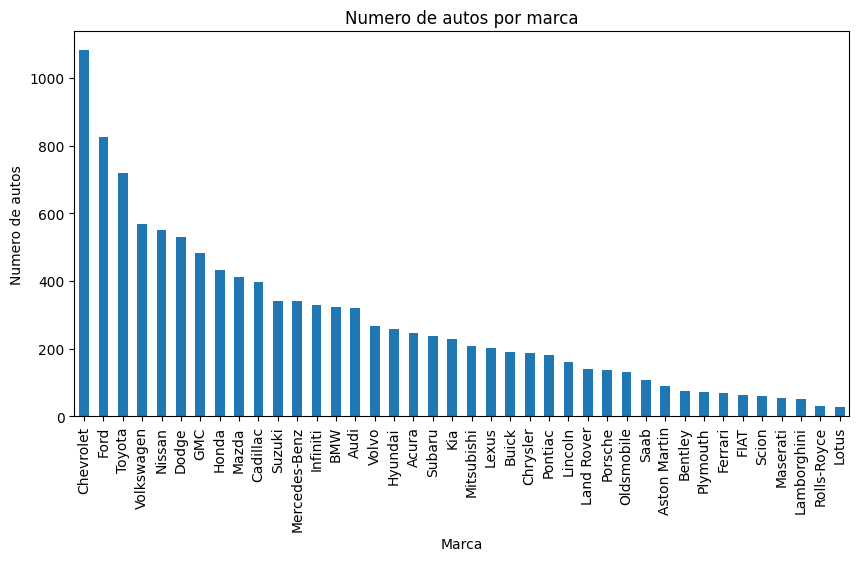

In [ ]:
# Tomamos el atributo fabricante (Make)
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Numero de autos por marca")
plt.ylabel('Numero de autos')
plt.xlabel('Marca')
plt.show()

### <font color='green'>**Actividad 3**</font>

1. Construya el histograma para la variable HP. Qué puede concluir de este histograma?
2. Construya el histograma para ``df2`` (sin outliers). Compare.

TIP: Utilice distintos valores de bins

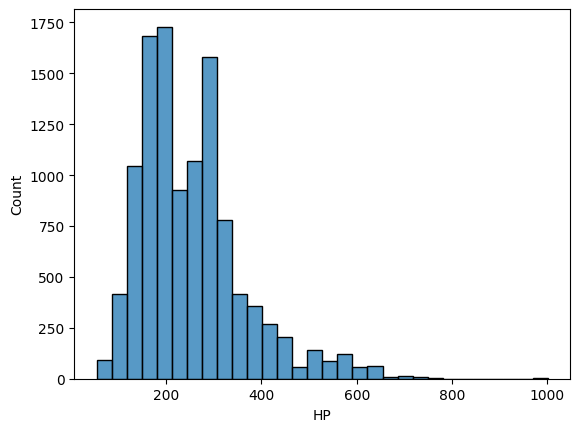

In [ ]:
sns.histplot(data=df, x="HP", bins=30);

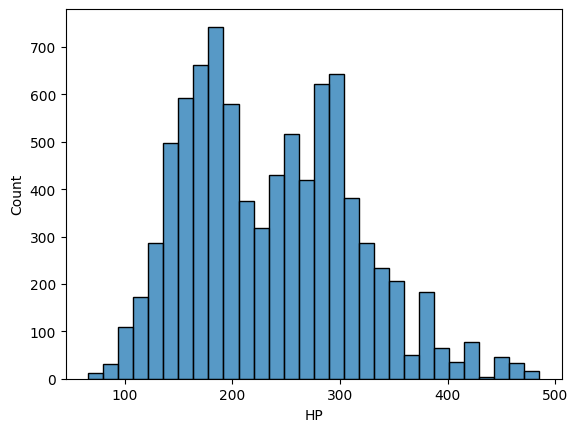

In [ ]:
sns.histplot(data=df2, x="HP", bins=30);

Probamos con distintos Bins y 30 fue adecuado. Del histograma se observa que hay dos grupos de autos, uno con motores mas grandes con un pick cercano a los 300HP y la otro con valores bajo los 200.

<font color='green'>Fin Actividad 3</font>

### __Mapas de calor__

El mapa de calor, es un tipo de gráfico que mide la relacion entre dos variables. Es necesario utilizar este diagrama para encontrar dependencia alta entre las variables. La dependencia alta entre variables,  puede impactar el desempeño de un algoritmo de aprendizaje automático. Una de las mejores formas de encontrar la relación entre las variables se puede realizar mediante mapas de calor. En el siguiente mapa de calor, sabemos que la función de precio depende principalmente de los caballos de fuerza y los cilindros.

In [ ]:
c = df.corr()
c.round(3)

<ipython-input-64-7a9f61857c16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000,0.336,-0.034,0.248,0.245,0.188,0.086,0.210
HP,0.336,1.000,0.788,-0.129,-0.415,-0.447,0.042,0.659
Cylinders,-0.034,0.788,1.000,-0.150,-0.617,-0.599,0.039,0.539
Number of Doors,0.248,-0.129,-0.150,1.000,0.115,0.121,-0.057,-0.145
MPG-H,0.245,-0.415,-0.617,0.115,1.000,0.886,-0.017,-0.167
MPG-C,0.188,-0.447,-0.599,0.121,0.886,1.000,-0.001,-0.162
Popularity,0.086,0.042,0.039,-0.057,-0.017,-0.001,1.000,-0.048
Price,0.210,0.659,0.539,-0.145,-0.167,-0.162,-0.048,1.000


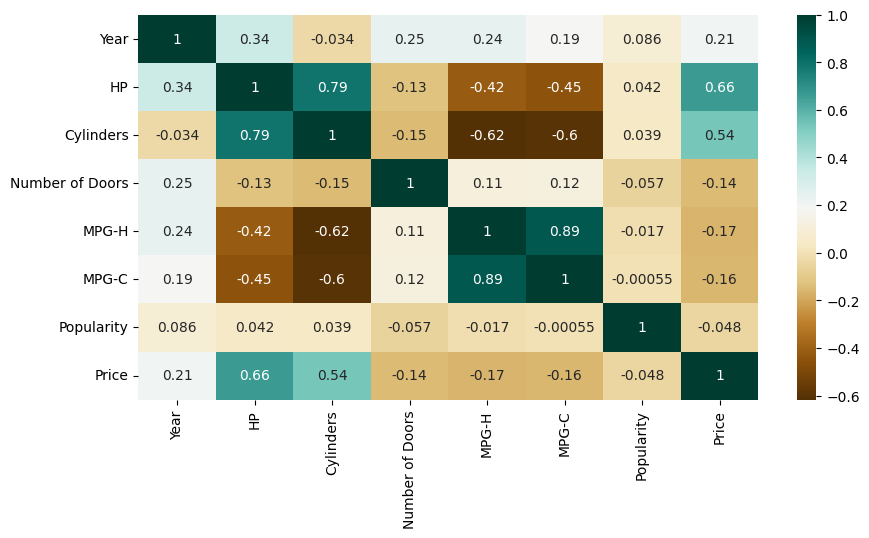

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(c,cmap="BrBG", annot=True)
plt.show()

### __Scatterplot__

Generalmente usamos diagramas de dispersión para encontrar la correlación visual entre dos variables. Aquí, los diagramas de dispersión se trazan entre Caballos de fuerza y Precio y podemos ver el diagrama a continuación. Con el gráfico que se muestra a continuación, podemos dibujar fácilmente una línea de tendencia.

Tambien se aprecia que hay dos grupos que se comportan distinto. Es probable que si quisieramos construir un predictor, estos comportamientos habria que diferenciarlos o buscar otras variables que relacionaran los puntos del grupo inferior.

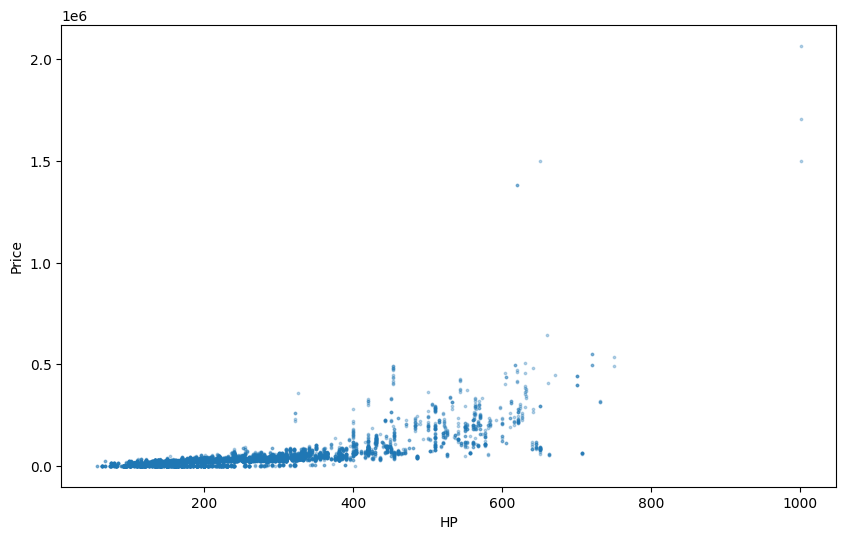

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'], alpha=0.3, s=3)
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Excelente !!